# **Structure of the individual portofolio notepad**
This is the structure of the notepad:

**Introduction**

**Readme**

>**Data**: wrangling

>>Objective 2 : Part of group project

>>Objective 3 : Part of group project

>**Information**: combining, analysis, data quality, visualization

>>Objective 2: Part of group project

>>Objective 3: Part of group project except for the story map.
Story map only for self learning.

>>Link to the story map : https://arcg.is/15ff4W0

>**Knowledge**: social and ethical aspects

>>Social and ethical analysis of data : Part of group project

**Reflection**

# **Introduction**

Based on the sugesstion from the lecturer, I did a revision to my personal plan. This is the updated version of my personal plan:

**Background and Motivation**

I am a master's student in the Urban Environmental Management program. I have working experience as an engineer and risk analyst. Data science is something that I have wanted to learn for a long time, as it is essential to create strategic corporate planning. It is not only helpful in generating information on current conditions but also in forecasting. Data Science for Smart Environment is a complete package for my interest in data science and environmental management.

**Expectation**

By taking this course, I am expecting to acquire skills for:
*   Generating patterns and insightful information using data science and visualization techniques
*   Evaluating the quality of data from machine learning and AI
*   Assess the social and ethical aspects of data.

**Knowledge gaps**

My knowledge includes basic Python programming, system analysis, statistics, data visualization and interpretation. I realize that Python, NumPy, Pandas and MatplotLib are the most common and useful tools in data science. Thus, I want to improve my programming skills for those tools and learn new tools such as ArcGIS, GeoDa, and GeoPandas.

Specifically, my learning goals for data, information and knowledge categories are:


*   **Data**: wrangling

> I learned data cleaning from a Python programming course in the previous period. At that moment, the raw data that I used was simple. Thus, I want to improve and implement my coding skills in this course by doing the data wrangling for objectives 2 and 3 of my group projects using Python and pandas.

> Objective 2 is to investigate the relationship between traffic and air pollution using machine learning (ML). We chose three algorithms for this objective: random forest regression, support vector regression, and multiple linear regression. I want to do data wrangling for multiple linear regressions.

>Objective 3 is Investigating the relationship between the annual average concentration of PM 2.5 and death caused by respiratory diseases. I also want to do the data wrangling for this objective.

*   **Information**: combining, analysis, data quality, visualization

>I used to combine information using Excel, but now I want to be able to combine data using pandas and analyse it using machine learning in python. Specifically, I want to combine information and do machine learning for objective 2 using a multiple linear regression algorithm then evaluate the quality of data from the result of the algorithm.

>As for objective 3, I will be creating a simple correlation analysis with the Pearson correlation coefficient and create a story map for the result using the software I have never used before, ArcGIS.

*   **Knowledge**: social and ethical aspects

>In this category, I want to assess the social and ethical aspects of my group data collection by reading the terms and conditions on each website and using the module in Brightspace as my guidelines.

## **Readme**
### **Data: Wrangling**

**Objective 2**:  Investigating the relationship between traffic and air pollution using machine learning (ML).

**The background**

This is the steps for the objective 2 :

1. Acquire data of the same time range.
2. Assemble a dataset with traffic performance data and emission data.
3. Preprocess the data and prepare the data for model fitting.
4. Use training and test sets for model training and evaluation.
5. Compare the three linear regression models used and find the best model for prediction.
6. Predict the emission from road transport for the next three year.

I did **data wrangling** as part of the **step 2 and 3**. Data that I structurize are number of transactions (monthly) by vehicle type, and number of vehicles (monthly) by vehicle type.

**Methodology and data source used**

> Methodology: categorizing data, calculate new value for each of the new categories, structuring a useful format of dataset for the analyzation using csv package in python.

> Data source:
>> https://transtat.stat.gov.pl/2-1/2-1-4.aspx (Number of transactions (monthly) by vehicle type). Data downloaded at 17 January 2024.

>> https://transtat.stat.gov.pl/2-1/2-1-14.aspx (Number of vehicles (monthly) by vehicle type). Data downloaded at 17 January 2024.


**Details about the implementation**

Raw data from the data source need to be structured from the monthly data into quarterly data per year. This is done by:

1. Download data as csv file
2. Import csv package
3. Categorize the months into quarterly
4. Accumulate number of vehicle and vehicle transactions from all type of vehicles per quarter
5. Create a new coloumn that represent the quarter of each year (year_quarter number) and a new column that containing the total number of vehicle and vehicle transaction.
6. The structured data then exported as new document.

Steps 2 until 6 is done in PyCharm. Below is the script for data wrangling. The downloaded data from https://transtat.stat.gov.pl/2-1/2-1-4.aspx is renamed as transaction_vehicle. The downloaded data from https://transtat.stat.gov.pl/2-1/2-1-14.aspx is renamed as num_vehicle. I did this to make the scripting simpler.

**Result**

The result is a new document containing the column 'Year' and 'Total'. Rows in column 'Year' written in the format of 'year_quarter number'. 'Total' is the total number of vehicle or number of vehicle transactions.

The result can be seen in files with name transaction_vehicle_clean.csv and num_vehicle_clean.csv. The script can be seen below the conclusion section and the result also printed under the script.

**Conclusion**

The result is same as I expected. The new document is now containing only important things that I needed for the next step of the objective 2.

Step 1 until 4 of objective 2 has been done by me and my other team mate. After discussion, we chose to using his script because it is more simpler than mine. However, I am still happy with my work since I gained skill for structuring the csv data using csv package in python.



In [ ]:
#script for structurize the number of transactions (monthly) by vehicle type data

import csv

# Open the CSV file
with open('transaction_vehicle.csv', 'r', newline='') as csvfile:
    # Create a CSV reader
    reader = csv.reader(csvfile)

    # Read the header
    header = next(reader)

    # Initialize a dictionary for processed rows
    processed_data = {}

    # Create list of quarter
    quarter_1 = ['Styczeń','Luty','Marzec' ]
    quarter_2 = ['Kwieceń','Maj','Czerwiec' ]
    quarter_3 = ['Lipec','Sierpień','Wrzesień' ]
    quarter_4 = ['Październik','Listopad','Grudzień' ]

    # Iterate through the rows
    for row in reader:
        # Separate the columns by comma
        row = [cell.replace(',', '') for cell in row]

        # Get the name from the first column
        name = row[1]

        # Add the number from the third until six column
        number = sum(float(value) for value in row[2:6])

        if name in quarter_1:
            name = row[0] + '_1'
        elif name in quarter_2:
            name = row[0] + '_2'
        elif name in quarter_3:
            name = row[0] + '_3'
        elif name in quarter_4:
            name = row[0] + '_4'

        # If the name is not in the dictionary, add it with the number as the value
        if name not in processed_data:
            processed_data[name] = number
        # If the name is already in the dictionary, add the number to the current value
        else:
            processed_data[name] += number

    # Initialize a list to store the processed data
    processed_list = []

    # Iterate through the dictionary and append the name, sum of numbers, and original header to the list
    for name, number in processed_data.items():
        processed_list.append([name, number])

# Open the output CSV file
with open('transaction_vehicle_clean.csv', 'w', newline='') as csvfile:
    # Create a CSV writer
    writer = csv.writer(csvfile)

    # Write the header to the output file
    writer.writerow(header[:1] + ['Total'])

    # Write the processed data to the output file
    for row in processed_list:
        writer.writerow(row)

# Print the processed data
print('Result:',processed_list)

Result: [['2019_1', 242805022.0], ['2019_2', 259935844.0], ['2019_3', 265171797.0], ['2019_4', 256056527.0], ['2020_1', 252948193.0], ['2020_2', 235311606.0], ['2020_3', 265055336.0], ['2020_4', 269344542.0], ['2021_1', 264851850.0], ['2021_2', 284647921.0], ['2021_3', 282070481.0], ['2021_4', 272594896.0], ['2022_1', 284717218.0], ['2022_2', 289783103.0], ['2022_3', 290559025.0], ['2022_4', 276227168.0], ['2023_1', 252313204.0], ['2023_2', 257719431.0], ['2023_3', 261203247.0], ['2023_4', 257911349.0]]


In [ ]:
#script for structurize the number of vehicles (monthly) by vehicle type data

import csv

# Open the CSV file
with open('num_vehicle.csv', 'r', newline='') as csvfile:
    # Create a CSV reader
    reader = csv.reader(csvfile)

    # Read the header
    header = next(reader)

    # Initialize a dictionary for processed rows
    processed_data = {}

    # Create list of quarter
    quarter_1 = ['Styczeń','Luty','Marzec' ]
    quarter_2 = ['Kwieceń','Maj','Czerwiec' ]
    quarter_3 = ['Lipec','Sierpień','Wrzesień' ]
    quarter_4 = ['Październik','Listopad','Grudzień' ]

    # Iterate through the rows
    for row in reader:
        # Separate the columns by comma
        row = [cell.replace(',', '') for cell in row]

        # Get the name from the first column
        name = row[1]

        # Add the number from the third until six column
        number = sum(float(value) for value in row[2:6])

        if name in quarter_1:
            name = row[0] + '_1'
        elif name in quarter_2:
            name = row[0] + '_2'
        elif name in quarter_3:
            name = row[0] + '_3'
        elif name in quarter_4:
            name = row[0] + '_4'

        # If the name is not in the dictionary, add it with the number as the value
        if name not in processed_data:
            processed_data[name] = number
        # If the name is already in the dictionary, add the number to the current value
        else:
            processed_data[name] += number

    # Initialize a list to store the processed data
    processed_list = []

    # Iterate through the dictionary and append the name, sum of numbers, and original header to the list
    for name, number in processed_data.items():
        processed_list.append([name, number])

# Open the output CSV file
with open('num_vehicle_clean.csv', 'w', newline='') as csvfile:
    # Create a CSV writer
    writer = csv.writer(csvfile)

    # Write the header to the output file
    writer.writerow(header[:1] + ['Total'])

    # Write the processed data to the output file
    for row in processed_list:
        writer.writerow(row)

# Print the processed data
print('Result:',processed_list)

Result: [['2019_1', 1449789.0], ['2019_2', 1540527.0], ['2019_3', 1532186.0], ['2019_4', 1507646.0], ['2020_1', 1459978.0], ['2020_2', 1394707.0], ['2020_3', 1524541.0], ['2020_4', 1521336.0], ['2021_1', 1502521.0], ['2021_2', 1613348.0], ['2021_3', 1621629.0], ['2021_4', 1379415.0], ['2022_1', 1388916.0], ['2022_2', 1410604.0], ['2022_3', 1421612.0], ['2022_4', 1392043.0], ['2023_1', 1264175.0], ['2023_2', 1296132.0], ['2023_3', 1298148.0], ['2023_4', 1304154.0]]


**Objective 3**: Investigating the relationship between the annual average concentration of PM 2.5 and death caused by respiratory diseases

This is the steps for the objective 3 :

1. Acquire the data of annual concentration of PM 2.5 and the rate of death caused by respiratory diseases and in each Voivodeship in Poland from 2013 until 2020.
2. Preprocess the data
3. Analyze the correlation between the annual air pollution PM 2.5 and death caused by respiratory disease using linear regression with python.
4. Create scatter plot that show the correlation between the annual concentration of PM 2.5 and the number of death caused by respiratory diseases in all Voivodeship.
5. Export the coefficient of correlation of between he annual concentration of PM 2.5 and the number of death caused by respiratory diseases per Voivodeship as an output file.

I did **data wrangling** as part of **the step 1 and 2**. Data that I structurize is concentration of PM 2.5 per voivodeship and death caused by respiratory diseases per voivodeship.

**Methodology and data source used**

>Methodology: categorizing data, calculate new value for each of the new categories, structuring a useful format of dataset for the analyzation using pandas and openpyxl in Python.

>Data source:

>>https://powietrze.gios.gov.pl/pjp/archives (concentration of PM 2.5 per voivodeship). Data downloaded at 21 January 2024.


>>https://ec.europa.eu/eurostat/databrowser/view/hlth_cd_acdr2__custom_9560742/default/table?lang=en (death caused by respiratory diseases). Data downloaded at 21 January 2024.

**Details about the implementation**

Concentration of PM 2.5 per voivodeship data

>The raw data of the annual concentration of PM 2.5 is written in Polish and has 13 columns. I only needed three columns for our analysis, so I filtered the data and translated the header into English. This is the steps of data structuring that I did:

>1. Download data as excel file
>2. Import pandas and openpyxl
>3. Choosing the column that I want to include in the analyzation
>4. Calculate the average concentration of PM 2.5 for each year and voivodeship
>5. Create a new data frame that containing the year, voivodeship and the averag concentration of PM 2.5 for each year and viovodeship.

Death caused by respiratory diseases

>After downloaded the data from https://ec.europa.eu/eurostat/databrowser/view/hlth_cd_acdr2__custom_9560742/default/table?lang=en, I rename the file as 'Diseases of the respiratory system' then transpose the data to make it easier for me to merge with the Concentration of PM 2.5 per voivodeship data for the next step of the objective.

**Result**

The results are:
* A new data frame containing the year, voivodeship and the average concentration of PM 2.5 for each year and viovodeship.
* A structured file of death caused by respiratory diseases containing the year, voivodeship and the rate of death caused by respiratory diseases for each year and viovodeship.

The script for the data wrangling can be seen in the script below the conclusion section. The downloaded data from https://powietrze.gios.gov.pl/pjp/archives is renamed as PM 2.5_voivodeship for simplicity reason.

The transposed data of death caused by respirational diseases can been below the script.

**Conclusion**

The data frame works well when combined with the analyzation script (this script will be discused in the next section). It means that the data frame containing the right information that I want to build using my data wrangling script. I have sucessfully learn pandas and openpyxl for data wrangling by creating this script.



In [ ]:
# Structure the data of PM 2.5 concentration

import pandas as pd
import openpyxl

#Open the CSV file
file_path = 'PM 2.5_voivodeship.xlsx'
wb = openpyxl.load_workbook(file_path)
sheet = wb.active

# Process the data
processed_data = {}
for row in range(2, sheet.max_row + 1):  #Row 1 contains headers
    year = sheet.cell(row=row, column=1).value
    voivodeship = sheet.cell(row=row, column=2).value
    avg_time = sheet.cell(row=row, column=7).value
    avg_pm25 = sheet.cell(row=row, column=8).value

    if avg_time == '24g':
        if year not in processed_data:
            processed_data[year] = {'Year': year, 'data': {voivodeship: [avg_pm25]}}
        else:
            if voivodeship not in processed_data[year]['data']:
                processed_data[year]['data'][voivodeship] = [avg_pm25]
            else:
                processed_data[year]['data'][voivodeship].append(avg_pm25)

# Calculate the average of avg_pm25 for each year and voivodeship
averaged_data = {}
for year, data in processed_data.items():
    for voivodeship, pm25_data in data['data'].items():
        avg_pm25 = sum(pm25_data) / len(pm25_data)
        if year not in averaged_data:
            averaged_data[year] = {'Year': year, 'data': {voivodeship: avg_pm25}}
        else:
            if voivodeship not in averaged_data[year]['data']:
                averaged_data[year]['data'][voivodeship] = avg_pm25
            else:
                averaged_data[year]['data'][voivodeship] = (averaged_data[year]['data'][voivodeship] + avg_pm25) / 2

columns = ['Year', 'voivodeship', 'avg_pm25']
avg_list = []

# Iterate through the 'averaged_data' dictionary and append each entry as a new row to the data frame
for year, data in averaged_data.items():
    for voivodeship, avg_pm25 in data['data'].items():
        df_tempt = pd.DataFrame({'Year': [year], 'Voivodeship': [voivodeship], 'Avg_pm25': [avg_pm25]})
        avg_list.append(df_tempt)

avg_df = pd.concat(avg_list, ignore_index=True)

print(avg_df)

     Year          Voivodeship   Avg_pm25
0    2013         dolnośląskie  23.911116
1    2013   kujawsko-pomorskie  17.111660
2    2013            lubelskie  21.405968
3    2013             lubuskie  19.610427
4    2013              łódzkie  27.831758
..    ...                  ...        ...
155  2022              śląskie  19.525192
156  2022       świętokrzyskie  16.178175
157  2022  warmińsko-mazurskie  12.302589
158  2022        wielkopolskie  18.939206
159  2022   zachodniopomorskie  12.004050

[160 rows x 3 columns]


**Result of the transposed data of Death Caused by Respiratory Disease**



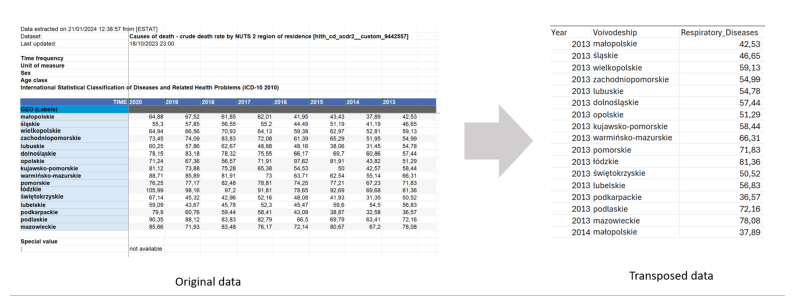

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/intan005/Data-Science/main/Raw%20Data/transposed%20data.png'

# Download the image content
response = requests.get(url)

# Open the image using Pillow
image = Image.open(BytesIO(response.content))

# Increase figure size
plt.figure(figsize=(10, 10))

# Display the image using matplotlib with increased DPI
plt.imshow(image)
plt.axis('off')  # Turn off axis

# Set a specific DPI value for better quality
plt.savefig('output_image.png', dpi=600, bbox_inches='tight')
plt.show()



## **Information: combining, analysis, data quality, visualization**

**Objective 2: Investigating the relationship between traffic and air pollution using machine learning (ML).**

**The background**

This is the steps for the objective 2 :

1. Acquire data of the same time range.
2. Assemble a dataset with traffic performance data and emission data.
3. Preprocess the data and prepare the data for model fitting.
4. Use training and test sets for model training and evaluation.
5. Compare the three linear regression models used and find the best model for prediction.
6. Predict the emission from road transport for the next three year.

In this section I did **step 3 and 4**.

**Methodology and data source used**

>Methodology: combining data from many sources into one dataset, create linear regression model and train the model using sklearn, create visualization of training data using matplotlib.
>>There are some methodolgies in splitting the data into training, test and validation. However, because the dataset is not complex so I chose to use **70% of data as train sets** as 70% or 80% is a common percentage in splitting the data for training.

>>I also put random state value **differently for each models** and not using the default value or negative value. The reasons are:
* I want it to produce the same splitting dataset for any integer value that I put.  
* I want to see what random state value that possitively affected the r2 score for each model. So for each model I changed the random state value a few times, the value that results in the highest positive r2 score is the value that I put in my final script.

>Data source: using the same data sources as the ones that I used in data wrangling section for Objective 2.

**Details about the implementation**

This is the detailed step for combining, analyze, evaluate and visualize the data that included in the step 3 and 4 of Objective 2:
1. Import relevant packages: pandas, matplotlib, numpy, sklearn
2. Import and combining number of vehicles transactions data, number of vehicles data and emission data (PM 2.5, CH4, N2O, NOx)
3. Determine variables
4. Create train and test sets
5. Create linear regression model and do model fitting
6. Calculate prediction
7. Model evaluation
8. Create vizualization for the training data

**Result**

The results are:
*   Model evaluation result including: mean squared error, mean absolute error, r2 score, root mean squared error.
*   Vizualization of training data with actual emission concentration as X axis and predicted emission concrentation as Y axis.

All of the results is available for each emissions: PM 2.5, CH4, N2O, NOx. To make the content of notepad more effective, only two scripts are included under the conclusion section (Multiple Linear Regression for PM 2.5 and CH4).

This is model evaluation summary for all emissions:

>**PM 2.5**
* Mean Squared Error :  271.0600421377013
* Mean Absolute Error :  15.331748381348472
* r2 score is  0.8143167746207485
* Root Mean Squared Error: 16.46390118221381

>**CH4**
* Mean Squared Error :  22.45186718014668
* Mean Absolute Error :  3.857010793345894
* r2 score is  0.8343362982925888
* Root Mean Squared Error: 4.7383401292168426


>**N2O**
* Mean Squared Error :  198.06662625907416
* Mean Absolute Error :  11.402861080101065
* r2 score is  0.3261818435816578
* Root Mean Squared Error: 14.07361454137046

>**NOx**
* Mean Squared Error :  1077239.3787485906
* Mean Absolute Error :  749.447581326964
* r2 score is  0.8214774158307212
* Root Mean Squared Error: 1037.9014301698357


**Conclusion**

Among all models, model for **CH4 is the best model** as it has the highest r2 score and the lowest Mean Squared Error. The model that has the worst accuracy of the model's predictions is model for NOx and the model that has the weakest linear relationship between X (number of vehicle transactions and number of vehicle) and Y (concentration of emissions) is model of N20. However, to better understand the correlation between X and Y I need to use another method as my current method cannot show the causality of X to Y. The time period could also be extended in order to get better quality of model as currently I only have quarterly data from 2019 until 2022 for number of vehicle transactions, number of vehicles and emissions concentration (PM 2.5, CH4, N2O, NOx).

I feel satisfy after I finished this script as I learned a lot about how we can use machine learning, what algorithm I can use, what is data training, data test dan data validation, how do I evaluate the data quality based on the result and what can I do to improve my model in order to find correlation between variables. Another important thing is I leared how to visualize my model quality.



[542.74357417 464.25727942 497.25996419 459.35219561 527.40094358]
Mean Squared Error :  271.0600421377013
Mean Absolute Error :  15.331748381348472
r2 score is  0.8143167746207485
Root Mean Squared Error: 16.46390118221381


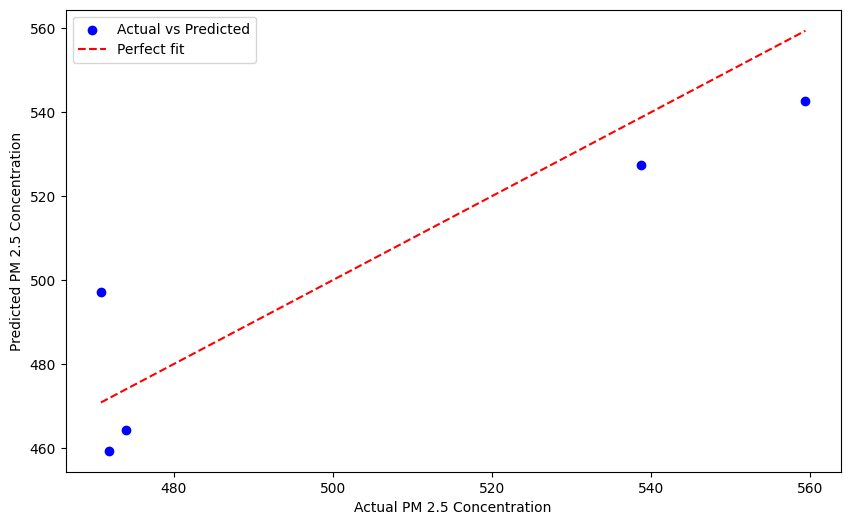

In [ ]:
#PM 2.5

# importing modules and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics

# importing data from vehicle transaction
doc1 = pd.read_csv('transaction_vehicle_clean.csv')
doc2 = pd.read_csv('num_vehicle_clean.csv')
doc3 = pd.read_csv('PM 2.5.csv')

#merge data from many different document
def merge_data(doc1,doc2,doc3):
    #rename variables
    doc1 = doc1.rename(columns={'Total':'Vehicle transactions'})
    doc2 = doc2.rename(columns={'Total':'Number of Vehicle'})
    doc3 = doc3.rename(columns={'Total':'PM 2.5 Concentration'})

    #select column 1 and 6 of doc3
    doc3_selected = doc3.iloc[:, [0, 5]]

    #merge data from doc1, doc2, doc3
    merged_data = pd.merge(doc1,doc2, on='Year')
    merged_data = pd.merge(merged_data, doc3_selected, on='Year')

    return merged_data

doc4 = merge_data(doc1,doc2,doc3)

# creating feature matrix and target vector
X = doc4[['Vehicle transactions','Number of Vehicle']]
y = doc4['PM 2.5 Concentration']

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

# creating a linear regression model
model = LinearRegression()

# fitting the model
model.fit(X_train, y_train)

# making predictions
y_pred = model.predict(X_test)
print(y_pred)

# model evaluation
score=r2_score(y_test,y_pred)
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('r2 score is ',score)
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

# visualize the training data
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect fit')
plt.xlabel('Actual PM 2.5 Concentration')
plt.ylabel('Predicted PM 2.5 Concentration')
plt.legend()
plt.show()


[66.7077088  83.45302358 67.88078472 74.17289538 61.38601031]
Mean Squared Error :  22.45186718014668
Mean Absolute Error :  3.857010793345894
r2 score is  0.8343362982925888
Root Mean Squared Error: 4.7383401292168426


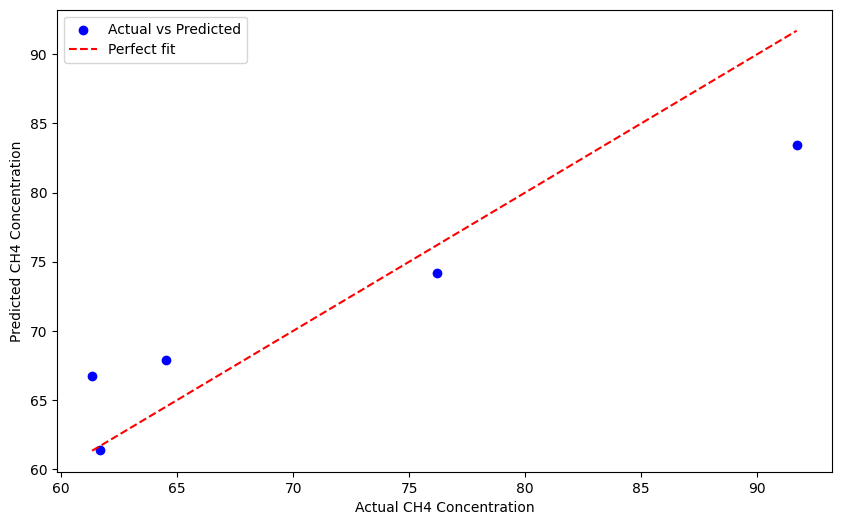

In [ ]:
#CH4

# importing modules and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics

# importing data from vehicle transaction
doc1 = pd.read_csv('transaction_vehicle_clean.csv')
doc2 = pd.read_csv('num_vehicle_clean.csv')
doc3 = pd.read_csv('CH4.csv')

#merge data from many different document
def merge_data(doc1,doc2,doc3):
    #rename variables
    doc1 = doc1.rename(columns={'Total':'Vehicle transactions'})
    doc2 = doc2.rename(columns={'Total':'Number of Vehicle'})
    doc3 = doc3.rename(columns={'Total':'CH4 Concentration'})

    #select column 1 and 6 of doc3
    doc3_selected = doc3.iloc[:, [0, 5]]

    #merge data from doc1, doc2, doc3
    merged_data = pd.merge(doc1,doc2, on='Year')
    merged_data = pd.merge(merged_data, doc3_selected, on='Year')

    return merged_data

doc4 = merge_data(doc1,doc2,doc3)

# creating feature matrix and target vector
X = doc4[['Vehicle transactions','Number of Vehicle']]
y = doc4['CH4 Concentration']

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=62)

# creating a linear regression model
model = LinearRegression()

# fitting the model
model.fit(X_train, y_train)

# making predictions
y_pred = model.predict(X_test)
print(y_pred)

# model evaluation
score=r2_score(y_test,y_pred)
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('r2 score is ',score)
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

# visualize the training data
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect fit')
plt.xlabel('Actual CH4 Concentration')
plt.ylabel('Predicted CH4 Concentration')
plt.legend()
plt.show()


**Objective 3**: Investigating the relationship between the annual average concentration of PM 2.5 and death caused by respiratory diseases

This is the steps for the objective 3 :

1. Acquire the data of annual concentration of PM 2.5 and the rate of death caused by respiratory diseases and in each Voivodeship in Poland from 2013 until 2020.
2. Preprocess the data
3. Analyze the correlation between the annual air pollution PM 2.5 and death caused by respiratory disease using linear regression with python.
4. Create scatter plot that show the correlation between the annual concentration of PM 2.5 and the number of death caused by respiratory diseases in all Voivodeship.
5. Export the coefficient of correlation of between he annual concentration of PM 2.5 and the number of death caused by respiratory diseases per Voivodeship as an output file.

In this section, I did **step 3 until 5**.

**Methodology and data source used**
>Methodology: combining data from many sources into one dataset using pandas, calculating the Pearson correlation coefficient between variables using pandas dataframe correlation method, creating new dataframe for the results using pandas, create vizualization using matplotlib and ArcGis.

>Data sources: using the same data sources as the ones that I used in data wrangling section for Objective 3.

**Details about the implementation**

This is the detailed step for combining, analyze, evaluate and visualize the data that included in the step 3 until 5 of Objective 3:
1. Import relevant packages: pandas, statsmodel, seaborn, matplotlib
2. Import and combining concentration of PM 2.5 data and death caused by respiratory diseases data.
3. Determine variables
4. Calculate the Pearson correlation coefficient
5. Create new data frame based on the results
6. Create visualization the relationship between X and Y with regression lines for each Voivodeship using matplotlib
> In the chart, I added a black line at Y-axis value 5 and give grey colour on the area above the line to show how many voivodeships have an annual average concentration of PM 2.5 that exceeds the WHO guidelines.
7. Model evaluation
8. Create storymap using ArcGis online
> Write introduction, step by step and result of objective 3.
> Include relevant websites that I used as references
> Add picture and give attribution

**Results**

The results are:
* Scatterplot that shows the correlation between annual average concentration of PM 2.5 data and death caused by respiratory diseases
* Storymap that containing the step by step, results and discussion of objective 3.

**This is the link of the story map: https://arcg.is/15ff4W0**

Insight from the results:
* The graph shows a weak negative relationship between the annual average of PM 2.5 concentration and death caused by respiratory disease.
* The grey area shows that all voivodeships have been exposed to dangerous concentration levels of PM 2.5 at all times between 2013 and 2020.
* The highest rates of death caused by respiratory diseases in Poland from 2018-2020 is happened with people aged 65 y.o or more.

**Conclusion**

The death caused by respiratory diseases might not be a right variable for modelling the relation of PM 2.5 exposure and respiratory diseases as the current time horizon is 7 years which is more fit to analyze the effect of the short-term exposure of PM 2.5 to chronic respiratory diseases.​ We can also include confounding variables in the analyzation to have better understanding of the relationship between these variables as the air pollution is not the only factors that contribute to the respiratory diseases.

In the process of writing and evaluating the models, I learned that the results is not always as I expected and that's okay. I learned to find my mistakes and what is the factors contribute to the unexpected results by reading some research paper. Overall my goal for learning to combine, analyze, evaluate data quality, and create visualization has been accomplished by doing this project.



     Year          Voivodeship   Avg_pm25  Respiratory_Diseases
0    2013         dolnośląskie  23.911116                 57.44
1    2013   kujawsko-pomorskie  17.111660                 58.44
2    2013            lubelskie  21.405968                 56.83
3    2013             lubuskie  19.610427                 54.78
4    2013              łódzkie  27.831758                 81.36
..    ...                  ...        ...                   ...
123  2020              śląskie  21.538059                 55.30
124  2020       świętokrzyskie  18.670982                 67.14
125  2020  warmińsko-mazurskie  12.391373                 88.71
126  2020        wielkopolskie  18.613556                 64.94
127  2020   zachodniopomorskie  11.568292                 73.45

[128 rows x 4 columns]


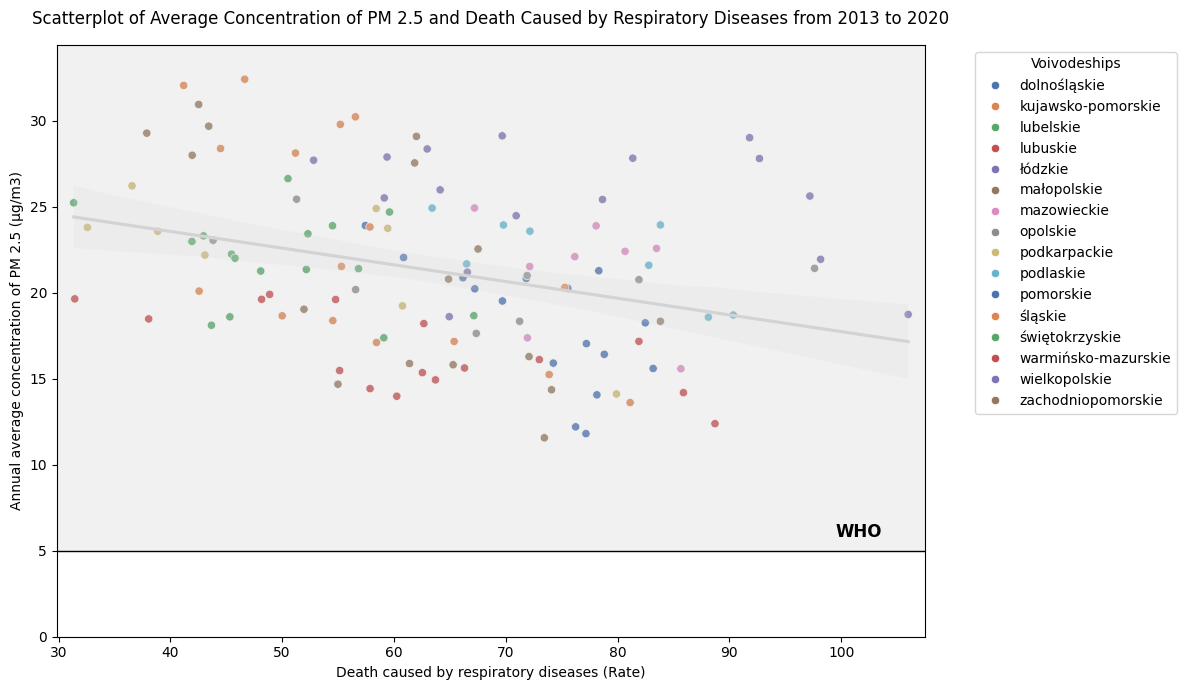

            Voivodeship  Correlation
0          dolnośląskie    -0.770073
1    kujawsko-pomorskie    -0.617880
2             lubelskie     0.178606
3              lubuskie    -0.541824
4               łódzkie    -0.702776
5           małopolskie    -0.726877
6           mazowieckie    -0.367647
7              opolskie    -0.372317
8          podkarpackie    -0.766783
9             podlaskie    -0.732648
10            pomorskie    -0.413624
11              śląskie    -0.587284
12       świętokrzyskie    -0.538815
13  warmińsko-mazurskie    -0.386861
14        wielkopolskie    -0.520024
15   zachodniopomorskie    -0.159537


In [ ]:
#Script for the linear regression start from line #Linear Regression.
#All the lines before #Linear Regression is the data wrangling script.
#I don't delete the data wrangling script as I will use the result (data frame) in the linear regression

# Structure the data of PM 2.5 concentration and death caused by respiratory diseases
import pandas as pd
import openpyxl

#Open the excel file
file_path = 'PM 2.5_voivodeship.xlsx'
wb = openpyxl.load_workbook(file_path)
sheet = wb.active

# Process the data
processed_data = {}
for row in range(2, sheet.max_row + 1):  #Row 1 contains headers
    year = sheet.cell(row=row, column=1).value
    voivodeship = sheet.cell(row=row, column=2).value
    avg_time = sheet.cell(row=row, column=7).value
    avg_pm25 = sheet.cell(row=row, column=8).value

    if avg_time == '24g':
        if year not in processed_data:
            processed_data[year] = {'Year': year, 'data': {voivodeship: [avg_pm25]}}
        else:
            if voivodeship not in processed_data[year]['data']:
                processed_data[year]['data'][voivodeship] = [avg_pm25]
            else:
                processed_data[year]['data'][voivodeship].append(avg_pm25)

# Calculate the average of avg_pm25 for each year and voivodeship
averaged_data = {}
for year, data in processed_data.items():
    for voivodeship, pm25_data in data['data'].items():
        avg_pm25 = sum(pm25_data) / len(pm25_data)
        if year not in averaged_data:
            averaged_data[year] = {'Year': year, 'data': {voivodeship: avg_pm25}}
        else:
            if voivodeship not in averaged_data[year]['data']:
                averaged_data[year]['data'][voivodeship] = avg_pm25
            else:
                averaged_data[year]['data'][voivodeship] = (averaged_data[year]['data'][voivodeship] + avg_pm25) / 2

columns = ['Year', 'voivodeship', 'avg_pm25']
avg_list = []

# Iterate through the 'averaged_data' dictionary and append each entry as a new row to the data frame
for year, data in averaged_data.items():
    for voivodeship, avg_pm25 in data['data'].items():
        df_tempt = pd.DataFrame({'Year': [year], 'Voivodeship': [voivodeship], 'Avg_pm25': [avg_pm25]})
        avg_list.append(df_tempt)

avg_df = pd.concat(avg_list, ignore_index=True)

#Linear Regression

# importing modules and packages
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# importing data
doc1 = avg_df
doc2 = pd.read_excel('Diseases of the respiratory system.xlsx', header=0)

merged_data = pd.merge(doc1,doc2, on=['Year', 'Voivodeship'])
print(merged_data)

# Extract the factors X and Y
Y = merged_data['Avg_pm25']
X = merged_data['Respiratory_Diseases']

# Initialize an empty list to store the results
results = []

# Iterate through each unique value in the 'Voivodeship' column
for voivodeship in merged_data['Voivodeship'].unique():
    # Filter the DataFrame to only include rows with the current value in the 'Voivodeship' column
    voivodeship_data = merged_data[merged_data['Voivodeship'] == voivodeship]

    # Calculate the correlation coefficient between X and Y for the filtered DataFrame
    corr = voivodeship_data['Respiratory_Diseases'].corr(voivodeship_data['Avg_pm25'])

    # Fit a regression model using OLS (ordinary least squares) on the filtered DataFrame
    result = smf.ols(formula='Respiratory_Diseases ~ Avg_pm25', data=voivodeship_data).fit()

    # Add the correlation coefficient and regression summary to the results list
    results.append((voivodeship, corr))

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Voivodeship','Correlation'])

# Get the maximum value of the y data
max_value = merged_data['Avg_pm25'].max()

# Visualize the relationship between X and Y with regression lines for each Voivodeship
plt.figure(figsize=(12, 7))  # Adjust the figure size

# Scatter plot
sns.scatterplot(data=merged_data, y='Avg_pm25', x='Respiratory_Diseases', hue='Voivodeship', palette='deep')

# Regression line
sns.regplot(data=merged_data, y='Avg_pm25', x='Respiratory_Diseases', scatter=False, color='lightgrey')

# Set axis limits
plt.xlim(left=(merged_data['Respiratory_Diseases'].min())-1.5, right=(merged_data['Respiratory_Diseases'].max())+1.5)
plt.ylim(bottom=0, top=max_value + 2)

# Labels and title
plt.ylabel('Annual average concentration of PM 2.5 (µg/m3)')
plt.xlabel('Death caused by respiratory diseases (Rate)')
plt.title('Scatterplot of Average Concentration of PM 2.5 and Death Caused by Respiratory Diseases from 2013 to 2020', pad=15)

# Legend
legend = plt.legend(title='Voivodeships')
legend.set_bbox_to_anchor((1.05, 1))  # Move the legend outside the plot area

# Add a horizontal line at y = 5
plt.axhline(y=5, color='black', linestyle='-', linewidth=1)

# Add the word "WHO" at the top of the line
plt.text(0.7, 0.22, 'WHO', transform=plt.gcf().transFigure, fontsize=12, fontweight='bold', color='black', verticalalignment='bottom')

# Add light grey color for the area above the line on y-axis value = 5
plt.axhspan(5, max_value + 2, color='lightgrey', alpha=0.3)

plt.tight_layout()

plt.show()

# Print the DataFrame
print(results_df)

# Save the DataFrame to a CSV file
results_df.to_excel('output_respiratory.xlsx', index=False)

This is the additional chart that I made to better understand the reason of the linear resgression has a weak negative association. I got the data from https://ec.europa.eu/eurostat/databrowser/view/hlth_cd_acdr2__custom_9616182/default/table?lang=en . Data downloaded at 27 January 2024.


By creating this chart, I wanted to get insight of how many years I should choose for my model in the future. The dominant age of people died because of respiratory diseases is 65 years old or older. Thus maybe I need more than 7 years of time period to get a better picture of the correlation between concentratin of PM 2.5 and death caused by respiratory diseases.

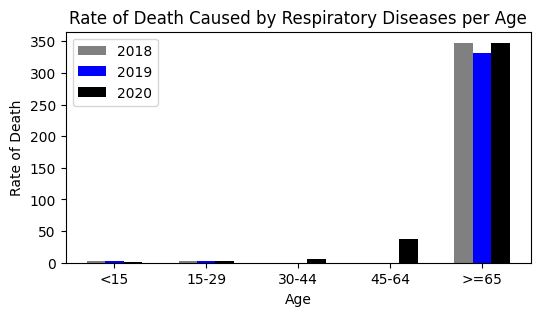

In [ ]:
#Additional chart created to have a better understanding on why the linear resgression has a weak negative association

import matplotlib.pyplot as plt
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('Death caused by respiratory diseases by age.xlsx', skiprows=1, usecols='A:D')

# Set the X and Y data columns
df.columns = ['Age', '2018', '2019', '2020']

# Create a new figure
fig, ax = plt.subplots(figsize=(6, 3))

# Plot all three categories on the same axes with different colors
ax.bar(df.index - 0.2, df['2018'], width=0.2, label='2018', color='grey')
ax.bar(df.index, df['2019'], width=0.2, label='2019', color='blue')
ax.bar(df.index + 0.2, df['2020'], width=0.2, label='2020', color='black')

# Set labels and title
ax.set_title('Rate of Death Caused by Respiratory Diseases per Age')
ax.set_xlabel('Age')
ax.set_ylabel('Rate of Death')

# Set x-axis ticks and labels
ax.set_xticks(df.index)
ax.set_xticklabels(df['Age'])

# Display legend
ax.legend()

# Show the plot
plt.show()

## **Knowledge: social and ethical aspects**

**Social and ethical analysis of data**

**The background**

In this sections I implemented what I have learned from Social and Ethical aspects of Smart Environments module to assess the ethics of all data that we use in Objective 2 and 3.

**Methodology and data source used**

Methodology: reading the data use policies for any public data that we use, reading the terms and conditions of websites that we use as our data sources, evaluating our way to use the data based on those terms and policy.

Data sources:
> Data number of vehicles, number of vehicle transactions, concentration of vehicle emissions in Poland: https://transtat.stat.gov.pl/

> Data concentration of PM 2.5 in Poland: https://powietrze.gios.gov.pl/pjp/archives

> Data death caused by respiratory diseases in Poland: https://ec.europa.eu/eurostat/cache/RCI/#?vis=nuts2.health&lang=en

**Details about the implementation**

This is the steps that I did in assessing the ethic of data for Objective 2 and 3:

1. Reading the terms and conditions of all websited that we as data sources
2. Make summary of the important points related with data ethics
3. Evaluate our works by asking these questions:
>* What do these data use policies
require from us as researchers?
>*When and how is consent required?
>*How and when have our data
subjects agreed to the use of their data by the platforms?
>*Could
they foresee their data being harvested for research purposes?
4. Adjusting our works based on the results of evaluation

**Results**

Summary of the ethical data analysis for objective 2 and 3 can be seen in this link
https://wageningenur4-my.sharepoint.com/:x:/r/personal/intan_pamungkas_wur_nl/Documents/Data%20Ethic%20Summary.xlsx?d=wc2b39784ee08415f909be79ea3296532&csf=1&web=1&e=pksCg0&nav=MTVfe0EyRjgxRDJDLUY4NzEtNDZEMC04MEJELTZGOTQyM0IxODQ4NX0

**Conclusions**

All websites allow people to use their data for free, some of them also open for request of any elements of digital availability and acessed through other methods beside reading text. This is a good policies as the website would be **more reachable for people with disabilities**.

Furthermore, the accessibility policy of most of the website indicate that the user has to clearly state the website provider as the user data source, including the date of our downloading time and describe any modification that the user with their data (if any). They also stated that if the user use data that copyright belong to other organization, then the user should check the other organization terms and condition too. These are essential policies as it will **prevent misinterprentation of the information** by people who will read the the modification data created by the user.

Based on that terms, my evaluation for our group projects are:
- We are free to use data from the website.
- We need to indicate the source of data and clearly stated the modification that we did with the data in our group project report/notepad.
- We didn't modify the data, thus we don't have to follow the disclaimer of non-responsibility from the data provider.
- We didn't use API to download the data. If we need to use API then we shouldn't download the data more than twice an hour.
- We didn't use data that copyright belongs partly or wholly to other organizations so we don't have to check terms and conditions of the third party.

Reading terms and conditions of websites is helping me to understand the ethical of data especially about how do we download, reference and present the data. I also realize how much the effort that the websites did to protect their user and their data. I let everyone in my group know about the result of ethical data evaluation so we can prepared our report better. Overall, I feel that my goal in understanding the ethical data is achieved by doing this evaluation.



# **Reflection**

***Struggling in scripting***
>I am using the book that I used in my previous python programming course but I need more help so I look for some references in websites such as https://docs.python.org/3/library/csv.html. I also use AI to check my script and fixed errors. The AI that I use is www.blackbox.ai. ***My team mates is a big helper for me*** as they helped me to check my script.

***Problems with the movement of script from PyCharm to Google Collab***

>Objective 2 is done by me and one of my team mates. I did one alogrithm and he did two algorithms so everytime I finished scripting, I gave my code to him through google collab.

>However, when I moved my script in PyCharm to google collab there is some differences in the reading of csv raw document. For example, if I open the raw csv file in my laptop excel app, the second column second row is written as 'StyczeÅ„' but when I open the file in google collab it written as 'Styczeń' so when I run the script in google collab it didn't work as same as in PyCharm. Thus, I changed part of my script '#Create list of quarter' in google collab to make the results same as the output file in my laptop.

>After thinking and discussing with my team mates, ***this case could be avoided if I just import the data from the website directly in my script***. In the future, I might try this when I writing script.

***Problems with understanding the result of the models***

>It's been more than 5 years since the last time I learn about statistics. At first, I am confused on why should I see the Mean Squared Error to see the accuracy of my multiple linear regression model and why r2 score is important so see how strong linear relationship between variables?. In this course I ***learn again about statistics and its relation with the machine learning***.

>I am amazed to know that ***there are many algorithm in machine learning and we can assess which algorithm that might be suitable for our objectives***. I also learned about how to read the results and know the quality of my model.

>Furthermore, I learned that ***if the result is not the same as I expected then it's not directly mean that our model is wrong***. Especially for objective 3 (Investigating the relationship between the annual average concentration of PM 2.5 and death caused by respiratory diseases), I did it from data wrangling until visualization. Logically, the result should be positive correlation but it is a weak negative correlation. I checked my scripts again, my team mates help me to check it. Nothing wrong with my script.

>I decided to discusess with my course coordinator (Arend) about the result. He told me to look at the concentration of PM 2.5 over the time and see if all the time the concentration exceed the standard. If it is above the standard then maybe the number of death is not increasing cause the people already sick since more than 10 years ago.

>I checked my chart and he was right. All the time from 2013 until 2020, the concentration is above the WHO guidelines. After that, I tried to looked at some research paper realted with respiratory diseases and air pollution. I found that previous studies on the association between mortality and exposure to ambient air pollution have been limited and results have been inconsistent. Some of them are positive association, and some of them are weak association. ***There are many factors contributed in the respiratory diseases and I only include air pollution. If I included confounding variables and use longer time horizon, then the result might be different.***